<a href="https://colab.research.google.com/github/srikant-ai/Deep_Learning_TensforFlow/blob/main/Introduction_to_Computer_Vision_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Nueral Network and Computer Vision with Tensoflow

##### Get the Data

The Images we're working with are from Food101 dataset (101 different classes of food) : https://www.kaggle.com/dansbecker/food-101

However i have modified it only use use two classes (pizza & Steak) using the data modification notebook.

In [1]:
import zipfile 

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-08-06 22:10:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M  92.5MB/s    in 1.1s    

2021-08-06 22:10:40 (92.5 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



In [2]:
#  Unzip the Downloaded Zip File 

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


##### Inspect the data (become one with it)

* A Very Crucial Step at the begging of any machine learning project is becoming one with data.

* And for a computer vision project... this usually means visuzlizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os 

# Walk through the pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"These are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

These are 2 directories and 1 images in 'pizza_steak'.
These are 2 directories and 1 images in 'pizza_steak/train'.
These are 0 directories and 750 images in 'pizza_steak/train/pizza'.
These are 0 directories and 750 images in 'pizza_steak/train/steak'.
These are 2 directories and 1 images in 'pizza_steak/test'.
These are 0 directories and 250 images in 'pizza_steak/test/pizza'.
These are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# The Extra File in our pizza_Steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug  6 22:10 .
drwxr-xr-x 1 root root 4096 Aug  6 22:10 ..
-rw-r--r-- 1 root root 6148 Aug  6 22:10 .DS_Store
drwxr-xr-x 4 root root 4096 Aug  6 22:10 test
drwxr-xr-x 4 root root 4096 Aug  6 22:10 train


#### To Visualize our images, first let's ge the class names programmatically

In [8]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Create a List of Class Name from Subdirectories
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
# Lets Visualize our Images 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup the target directory (we'll view images from here)
  target_folder=target_dir+"/"+target_class
  # Get a Random image path
  random_image = random.sample(os.listdir(target_folder),1)
  #print(random_image)
  # Read in the image and Plot it using matplotlib
  img =mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Show the shape of the image
  print(f"Image Shape : {img.shape}") 

  return img


Image Shape : (384, 512, 3)


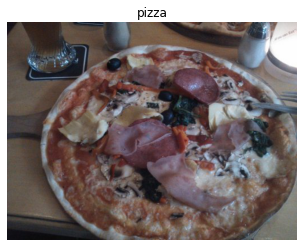

In [10]:
# View random Pizza image from training data
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='pizza')

Image Shape : (384, 512, 3)


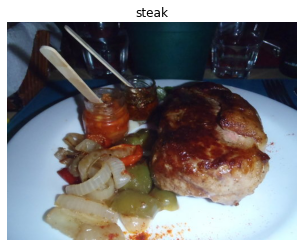

In [11]:
# View random Steak image from training data
img=view_random_image(target_dir='pizza_steak/train',
                  target_class='steak')

In [12]:
img.dtype

dtype('uint8')

In [13]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 42,  50,  53],
        [ 36,  44,  47],
        [ 30,  37,  45],
        ...,
        [ 13,   9,  23],
        [ 12,   8,  22],
        [ 12,   8,  22]],

       [[ 38,  43,  46],
        [ 33,  38,  42],
        [ 28,  33,  39],
        ...,
        [ 13,   9,  23],
        [ 12,   8,  22],
        [ 12,   8,  22]],

       [[ 34,  38,  41],
        [ 30,  34,  37],
        [ 25,  28,  35],
        ...,
        [ 13,   9,  23],
        [ 13,   9,  23],
        [ 13,   9,  23]],

       ...,

       [[135, 168, 199],
        [135, 168, 199],
        [135, 168, 199],
        ...,
        [222, 253, 255],
        [222, 253, 255],
        [222, 253, 255]],

       [[135, 168, 199],
        [135, 168, 199],
        [135, 168, 199],
        ...,
        [222, 253, 255],
        [221, 252, 254],
        [221, 252, 254]],

       [[135, 168, 199],
        [135, 168, 199],
        [135, 168, 199],
        ...,
        [221, 252, 25

In [14]:
img.shape # Gives Width, Height and Colour Channels

(384, 512, 3)

**Note** : Machine Learning Models/Deep Learning Models prefer to work with values between 0 or 1. Knowing this , One of the Common Preprocessing steps for working with images is to scaler (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value). 

In [15]:
# Get all the Pixel values between 0 & 1
img/255

array([[[0.16470588, 0.19607843, 0.20784314],
        [0.14117647, 0.17254902, 0.18431373],
        [0.11764706, 0.14509804, 0.17647059],
        ...,
        [0.05098039, 0.03529412, 0.09019608],
        [0.04705882, 0.03137255, 0.08627451],
        [0.04705882, 0.03137255, 0.08627451]],

       [[0.14901961, 0.16862745, 0.18039216],
        [0.12941176, 0.14901961, 0.16470588],
        [0.10980392, 0.12941176, 0.15294118],
        ...,
        [0.05098039, 0.03529412, 0.09019608],
        [0.04705882, 0.03137255, 0.08627451],
        [0.04705882, 0.03137255, 0.08627451]],

       [[0.13333333, 0.14901961, 0.16078431],
        [0.11764706, 0.13333333, 0.14509804],
        [0.09803922, 0.10980392, 0.1372549 ],
        ...,
        [0.05098039, 0.03529412, 0.09019608],
        [0.05098039, 0.03529412, 0.09019608],
        [0.05098039, 0.03529412, 0.09019608]],

       ...,

       [[0.52941176, 0.65882353, 0.78039216],
        [0.52941176, 0.65882353, 0.78039216],
        [0.52941176, 0

### An end-to-end example 

Let's build a convolutional nueral network to find pattern's in our images, more specifically we need a way to :

* Load our images 
* Preprocess our images 
* Build a CNN to find patterns in our images 
* Compile our CNN 
* Fit the CNN to our training data 


In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed 
tf.random.set_seed(42)

# preprocessing the data (get all of the pizel values between 0 & 1, also called as scaling/Normalizing)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

# Build a CNN Model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(filters=10,
                                     kernel_size=3,
                                     activation="relu",
                                     input_shape=(224,224,3)),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.Conv2D(10,3,activation="relu"),
              tf.keras.layers.MaxPool2D(pool_size=2,
                                        padding="valid"),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

# Compile our CNNN Model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5336 - accuracy: 0.7280 - val_loss: 0.3620 - val_accuracy: 0.8580
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4118 - accuracy: 0.8113 - val_loss: 0.3438 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3901 - accuracy: 0.8267 - val_loss: 0.3219 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3560 - accuracy: 0.8527 - val_loss: 0.3069 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3172 - accuracy: 0.8653 - val_loss: 0.3137 - val_accuracy: 0.8720


In [17]:
# Get a model Summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# 